[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3554592e-05
 -5.7906924e-05 -7.1712668e-05]
(203776,)


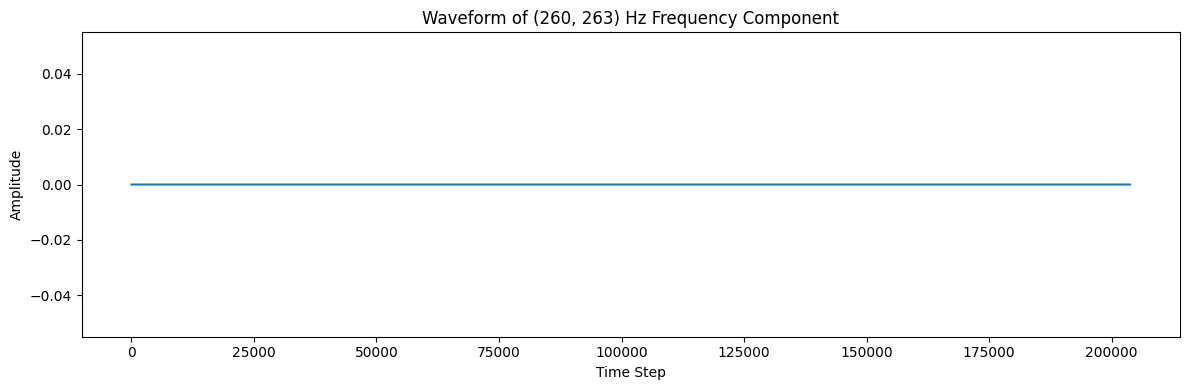

In [20]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
# 设置要加载的音频文件路径
filename = r"C:\Users\garyhu\Desktop\鋼琴.mp3"

# 设置要提取的特定频率范围
target_frequency = (260, 263)  # 包括中央C的频率范围

# 加载音频文件
audio, sr = librosa.load(filename, sr=None)
print(audio)
# 执行傅立叶变换
fft_result = np.abs(np.fft.fft(audio))
print(fft_result.shape)

time = np.arange(len(audio)) / sr

fft_result_copy = fft_result.copy()
fft_result_copy[(time < target_frequency[0]) | (time > target_frequency[1])] = 0

# 执行逆傅立叶变换，得到特定频率的波形
filtered_audio = np.fft.ifft(fft_result_copy)

# 绘制提取的波形
plt.figure(figsize=(12, 4))
plt.plot(filtered_audio.real)  # 只取实部，虚部通常是小的数字
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.title("Waveform of {} Hz Frequency Component".format(target_frequency))
plt.tight_layout()
plt.show()
Audio(audio,rate=sr)